# 1. Import modules and load MERFISH data 

In [1]:
# default imports
import numpy as np
import pandas as pd
import os, sys
import re
import matplotlib.pyplot as plt
print(os.getpid())

1260655


In [2]:
# scanpy related imports
#import seaborn as sns
#import anndata
#import scanpy as sc


#sc.settings.n_jobs = 24
#sc.settings.set_figure_params(dpi=180, dpi_save=300, frameon=False, figsize=(4, 4), fontsize=8, facecolor='white')


In [2]:
# ChromAn related imports
sys.path.append(r"/lab/weissman_imaging/puzheng/Softwares")

from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

In [3]:
def _parse_list(inputString: str, dtype=float):
    if ',' in inputString:
        return np.fromstring(inputString.strip('[] '), dtype=dtype, sep=',')
    else:
        return np.fromstring(inputString.strip('[] '), dtype=dtype, sep=' ')

def _parse_int_list(inputString: str):
    return _parse_list(inputString, dtype=int)

In [4]:
isinstance(data_organization.iloc[1]['fiducialFrame'], np.integer)

AttributeError: module 'ChromAn.src.file_io.data_organization' has no attribute 'iloc'

In [ ]:
type(data_organization.iloc[1]['frame'])

In [12]:
data_organization.iloc[1]['zPos']

array([-6.5, -5.5, -4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,
        4.5,  5.5])

## 1.1 Input/output folder

In [5]:
merlin_output_folder = r'/lab/weissman_imaging/puzheng/MERFISH_analysis/20230623-KPtumor_C2/'
#merlin_output_folder = r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\MERFISH_analysis\20230513-wtBrain_MO4'
# generate post-analysis folders
#postanalysis_folder = merlin_output_folder+'_PostAnalysis'
postanalysis_folder = os.path.join(merlin_output_folder, 'PostAnalysis')
if not os.path.exists(postanalysis_folder):
    print(f"Create postanalysis_folder: {postanalysis_folder}")
    os.makedirs(postanalysis_folder)
else:
    print(f"Use postanalysis_folder: {postanalysis_folder}")

Create postanalysis_folder: /lab/weissman_imaging/puzheng/MERFISH_analysis/20230623-KPtumor_C2/PostAnalysis


In [6]:
data_organization = pd.read_csv(os.path.join(merlin_output_folder, 'dataorganization.csv'),
                               converters={'frame': _parse_int_list, 'zPos': _parse_list}) 

In [8]:
codebook = pd.read_csv(os.path.join(merlin_output_folder, 'codebook_0_C2v6_codebook.csv'),
                               converters={'frame': _parse_int_list, 'zPos': _parse_list}) 

In [10]:
codebook

,name,id,RS0015,RS0083,RS0095,RS0109,RS0175,RS0237,RS0247,RS0255,...,RS0343,RS0384,RS0406,RS0451,RS0468,RS0548,RS0578,RS0584,RS0639,RS0707
0,Abi3bp,NM_178790,0,0,0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,0
1,Ablim1,NM_001103178,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,Ackr3,NM_007722,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,Acp5,NM_007388,0,0,0,0,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
4,Acta2,NM_007392,0,0,0,1,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,Blank-11,NaN,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
281,Blank-12,NaN,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
282,Blank-13,NaN,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
283,Blank-14,NaN,0,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0


# 2. Load MERLin decoding results

In [28]:
import tifffile
preprocess_folder = os.path.join(merlin_output_folder, 'DeconvolutionPreprocess', 'histograms')


In [30]:
test_histogram = np.load(os.path.join(preprocess_folder, os.listdir(preprocess_folder)[1]))

In [38]:
np.cumsum(test_histogram,axis=1)

array([[42215759., 42610212., 42947865., ..., 62914560., 62914560.,
        62914560.],
       [42406288., 42846920., 43220482., ..., 62914560., 62914560.,
        62914560.],
       [46908096., 47333160., 47690186., ..., 62914560., 62914560.,
        62914560.],
       ...,
       [43316694., 43795629., 44198750., ..., 62914560., 62914560.,
        62914560.],
       [42020928., 42515936., 42931376., ..., 62914560., 62914560.,
        62914560.],
       [42411618., 42931090., 43365471., ..., 62914560., 62914560.,
        62914560.]])

In [11]:
import tifffile
decode_folder = os.path.join(merlin_output_folder, 'Decode', 'images')


In [12]:
test_im = tifffile.imread(os.path.join(decode_folder, os.listdir(decode_folder)[1]))

In [21]:
sel_species = test_im[0::3].copy()
sel_species[(sel_species <200) & (sel_species > 0)] = -1
#[(test_im[0::3] >600) * (test_im[0::3] > 0)]

In [22]:
blank_ids, blank_counts = np.unique(sel_species[sel_species > 0], return_counts=True)

In [23]:
codebook.loc[blank_ids[blank_counts > 1000]]

,name,id,RS0015,RS0083,RS0095,RS0109,RS0175,RS0237,RS0247,RS0255,...,RS0343,RS0384,RS0406,RS0451,RS0468,RS0548,RS0578,RS0584,RS0639,RS0707
200,Pf4,NM_019932,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
201,Pim1,NM_008842,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202,Pkib,NM_001039051,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
203,Plac8,NM_139198,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
204,Plaur,NM_011113,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,Blank-11,NaN,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
281,Blank-12,NaN,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
282,Blank-13,NaN,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
283,Blank-14,NaN,0,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0


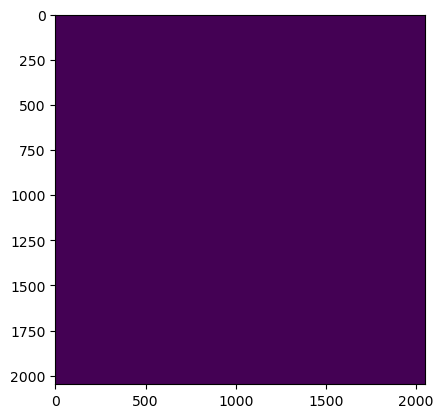

In [24]:
plt.figure()
plt.imshow(sel_species[5], vmin=500, vmax=750, interpolation='nearest')

<IPython.core.display.Javascript object>


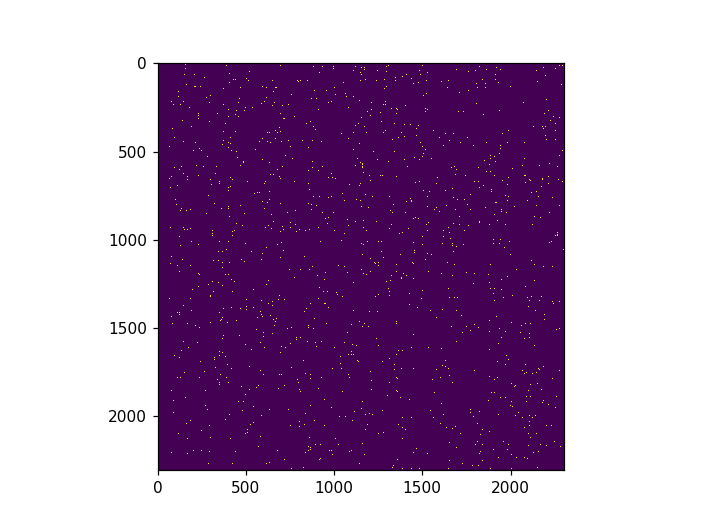

In [134]:
plt.figure()
plt.imshow((test_im[0::3]==759).max(0), interpolation='nearest')

<IPython.core.display.Javascript object>


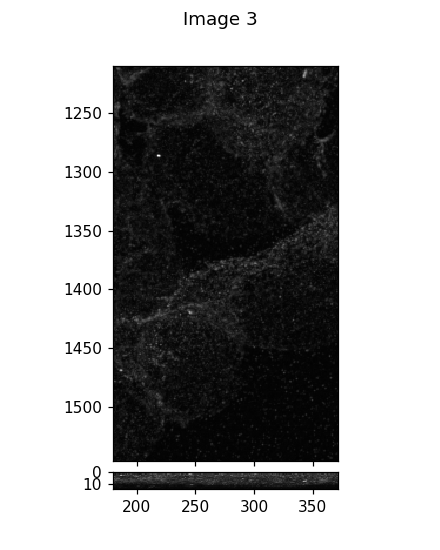

In [25]:
%matplotlib notebook
interactive.imshow_mark_3d([sel_species, test_im[0::3],test_im[1::3],test_im[2::3]])

In [26]:
fiducial_folder = os.path.join(merlin_output_folder, 'FiducialCorrelationWarp', 'images')
test_fiducial_im = tifffile.imread(os.path.join(fiducial_folder, os.listdir(fiducial_folder)[11]))

<IPython.core.display.Javascript object>


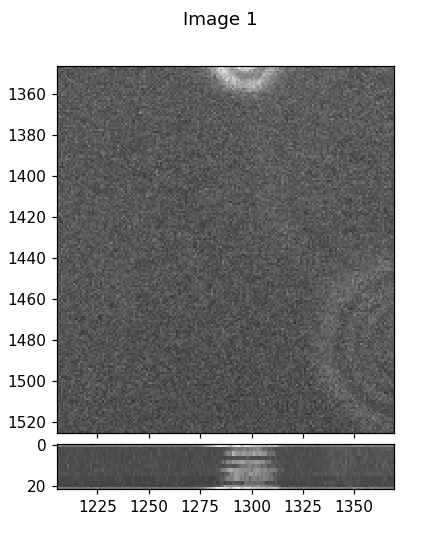

In [27]:
%matplotlib notebook
interactive.imshow_mark_3d([test_fiducial_im], min_max_default=[500,5000])

## Interpret decoding barcodes

In [87]:
decode_barcode_folder = os.path.join(merlin_output_folder, 'Decode', 'barcodes')
decode_barcode_files = [os.path.join(decode_barcode_folder, _f) for _f in os.listdir(decode_barcode_folder)]

In [120]:
import h5py
with h5py.File(decode_barcode_files[1], 'r') as _f:
    print(_f['barcodes']['_i_table']['index'].keys())
    #barcode_table = _f['barcodes']['table'][:]
    barcode_i_table = _f['barcodes']['_i_table']['index']['indices'][:]

<KeysViewHDF5 ['abounds', 'bounds', 'indices', 'indicesLR', 'mbounds', 'mranges', 'ranges', 'sorted', 'sortedLR', 'zbounds']>


In [121]:
barcode_i_table.shape

(34, 221184)

In [105]:
barcode_table[0]

(9, [ 1.2268552e+00,  1.2268552e+00,  4.9557886e-01,  4.9557886e-01,  1.6430000e+03,  8.4000000e+01,  0.0000000e+00,  7.7530103e+02, -3.1477119e+03,  0.0000000e+00,  0.0000000e+00,  8.0457866e-02,  0.0000000e+00,  2.5285110e-01,  1.0588278e-02,  5.3554896e-02,  1.7284999e-02,  2.8225372e-02,  1.1973638e-02,  2.0576645e-02,  6.1332606e-02,  2.2339886e-01,  4.4526514e-02,  1.0745988e-01,  0.0000000e+00,  3.0750793e-03,  5.2056932e-03,  4.4235740e-02,  1.1235834e-01,  5.7984573e-01,  1.4979811e-01,  2.7839202e-01,  4.4659540e-01,  7.3170446e-02,  6.5269195e-03,  3.9069238e-03,  0.0000000e+00,  4.4956857e-01], [-1], [  0, 145,   1])

In [106]:
barcode_table[1]

(10, [ 2.1080146e+00,  2.1080146e+00,  5.6914860e-01,  5.6914860e-01,  1.2720000e+03,  9.8000000e+01,  0.0000000e+00,  7.3560400e+02, -3.1462139e+03,  0.0000000e+00,  3.0785618e-02,  1.5352827e-03,  8.8859187e-04,  4.2333186e-02,  6.1623310e-03,  0.0000000e+00,  0.0000000e+00,  7.0401609e-02,  0.0000000e+00,  2.6612259e-03,  0.0000000e+00,  7.3487952e-02,  0.0000000e+00,  2.7518118e-02,  1.6214089e-02,  2.1476191e-02,  0.0000000e+00,  1.5733058e-02,  0.0000000e+00,  7.2943318e-01,  4.5666680e-02,  4.7878683e-01,  4.6784979e-01,  2.0278513e-03,  5.3180940e-02,  0.0000000e+00,  3.9178282e-03,  0.0000000e+00], [-1], [  0, 145,   1])

In [122]:
len(barcode_table)

7617955

# Test fiducial correction parameters

In [19]:

from skimage import registration

In [20]:
registration.phase_cross_correlation(test_fiducial_im[0],test_fiducial_im[11],upsample_factor=100,normalization=None)[0]

array([-0.01, -0.02])

In [21]:
fiducial_output_folder = os.path.join(merlin_output_folder, 'FiducialCorrelationWarp', 'transformations')
print(fiducial_output_folder)
test_transform = np.load(os.path.join(fiducial_output_folder, os.listdir(fiducial_output_folder)[10]),
                         allow_pickle=True)

/lab/weissman_imaging/puzheng/MERFISH_analysis/20230928-4T1F170_MF2/FiducialCorrelationWarp/transformations


In [22]:
test_transform

array([[[  1.  ,  -0.  ,  -0.  ],
        [  0.  ,   1.  ,  -0.  ],
        [  0.  ,   0.  ,   1.  ]],

       [[  1.  ,  -0.  ,  -0.  ],
        [  0.  ,   1.  ,  -0.  ],
        [  0.  ,   0.  ,   1.  ]],

       [[  1.  ,  -0.  ,   0.49],
        [  0.  ,   1.  ,   2.04],
        [  0.  ,   0.  ,   1.  ]],

       [[  1.  ,  -0.  ,   0.49],
        [  0.  ,   1.  ,   2.04],
        [  0.  ,   0.  ,   1.  ]],

       [[  1.  ,  -0.  ,   0.9 ],
        [  0.  ,   1.  ,   2.98],
        [  0.  ,   0.  ,   1.  ]],

       [[  1.  ,  -0.  ,   0.9 ],
        [  0.  ,   1.  ,   2.98],
        [  0.  ,   0.  ,   1.  ]],

       [[  1.  ,  -0.  , -57.17],
        [  0.  ,   1.  ,  -1.59],
        [  0.  ,   0.  ,   1.  ]],

       [[  1.  ,  -0.  , -57.17],
        [  0.  ,   1.  ,  -1.59],
        [  0.  ,   0.  ,   1.  ]],

       [[  1.  ,  -0.  , -58.07],
        [  0.  ,   1.  ,  -2.07],
        [  0.  ,   0.  ,   1.  ]],

       [[  1.  ,  -0.  , -58.07],
        [  0.  ,   1.  ,  -2.0